In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import aplpy
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits
import astropy.coordinates as coord
from astropy.wcs import WCS
import matplotlib.patheffects as PE
import brewer2mpl
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors
dark2 = brewer2mpl.get_map('Dark2', 'qualitative', 8).mpl_colors
import prettyplotlib as ppl
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib import rc
from cycler import cycler
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)
rc('axes', prop_cycle=cycler('color', set2))

In [2]:
fitsstr = '../calibrated_files/fitsimg/'
fitsfiles = [fitsstr + 'Omega_Cen_Ks.fits',
             fitsstr + 'omegaCen_3_3p6um.fits',
             fitsstr + 'omegaCen_3_4p5um.fits',
             fitsstr + 'Omega_Cen_Ks.fits',
             fitsstr + 'omegaCen_2_3p6um.fits',
             fitsstr + 'omegaCen_2_4p5um.fits']

In [3]:
rrl = pd.read_csv('Kaluzny2004rrl.txt', usecols=[0,1,2,4], delim_whitespace=True)

id_crowded = 366
id_uncrowded = 5

crowded = rrl[rrl.id == id_crowded] # 118, 264, 366
uncrowded = rrl[rrl.id == id_uncrowded] # 3, 5, 13

def get_x_y(df):
    ra1 = coord.Angle(df.ra, unit='hour')
    abra = ra1.degree
    dec1 = coord.Angle(df.dec, unit='deg')
    abdec = dec1.degree
    #x1, y1 = wcs2.all_world2pix(abra, abdec, 1)
    return abra, abdec

x1, y1 = get_x_y(crowded)
x2, y2 = get_x_y(uncrowded)

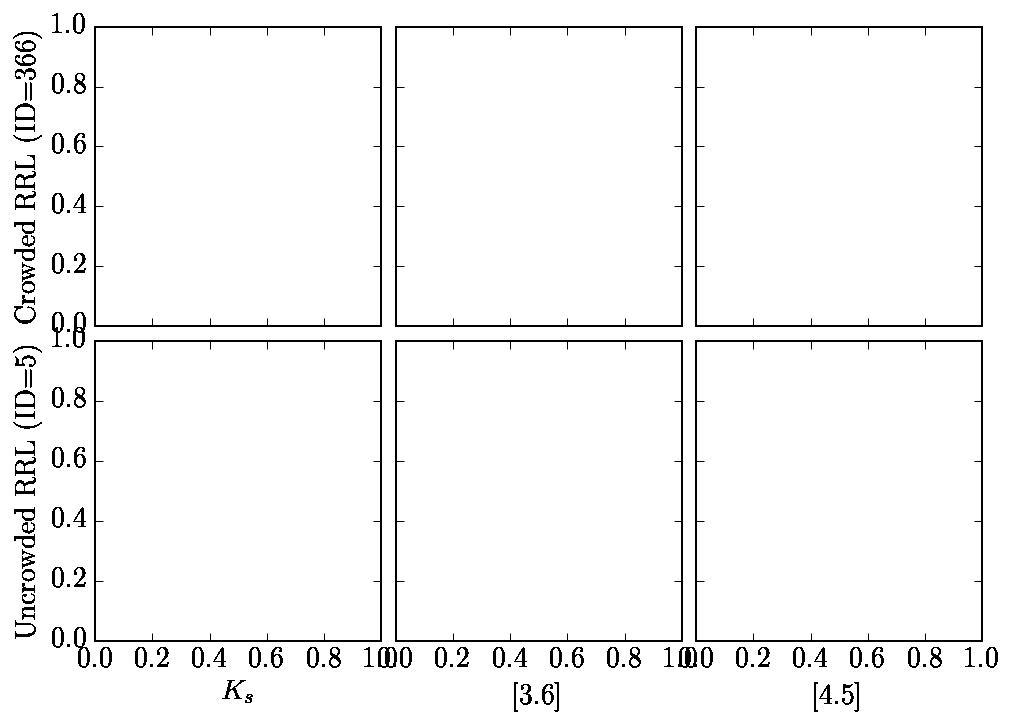

In [4]:
fig, axes = plt.subplots(2,3,figsize=(7,5), sharex=True, sharey=True)
axes = axes.ravel()

fig.tight_layout()
fig.subplots_adjust(hspace=0.05,wspace=0.05)
axes[3].set_xlabel('$K_s$')
axes[4].set_xlabel('$[3.6]$')
axes[5].set_xlabel('$[4.5]$')
axes[0].set_ylabel('Crowded RRL (ID={})'.format(id_crowded))
axes[3].set_ylabel('Uncrowded RRL (ID={})'.format(id_uncrowded))
# for x,y in herp:
#     ax.add_label(x, y, str(x) + ',' + str(y), color='pink')


# ppl.legend(handles=handles, labels=labels, loc=2, prop={'size':14}, handlelength=1, numpoints=1)


#ax.save('final_plots/omegacen_coverage_map_new.pdf', dpi=400)

In [5]:
for i in range(6):
    ax0 = axes[i]
    pos0 = ax0.get_position()
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax = aplpy.FITSFigure(fitsfiles[i], north=True,
                          figure=fig, subplot=[pos0.x0, pos0.y0, pos0.width, pos0.height])
    if i in [0,3]:
        ax.show_grayscale(vmin=10**2.5,vmax=10**3.5,stretch='log') #,vmid=-1
    else:
        ax.show_grayscale(vmin=1.,vmax=50,stretch='log') #,vmid=-1
    ax.set_theme('publication')
    ax.ticks.hide()
    ax.tick_labels.hide()
    ax.axis_labels.hide()
    #ax.tick_labels.set_yformat('dd:mm')
    #ax.tick_labels.set_xformat('hh:mm')
    if i < 3:
        ax.recenter(x1, y1, width=0.006, height=0.006)
        ax.show_circles(x1, y1, radius=3.6/3600)
    else:
        ax.recenter(x2, y2, width=0.006, height=0.006)
        ax.show_circles(x2, y2, radius=3.6/3600)        
    ax.frame.set_linewidth(0.75)


INFO: Deleting work directory /var/folders/_2/fhrfr21s36b5dqkbxgpdjdp00000gn/T/tmpZuMITN [montage_wrapper.wrappers]


/Users/Meredith/anaconda2/envs/iraf27/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)
/Users/Meredith/anaconda2/envs/iraf27/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Deleting work directory /var/folders/_2/fhrfr21s36b5dqkbxgpdjdp00000gn/T/tmpXFlbp1 [montage_wrapper.wrappers]
INFO: Deleting work directory /var/folders/_2/fhrfr21s36b5dqkbxgpdjdp00000gn/T/tmpKHWMMt [montage_wrapper.wrappers]


KeyboardInterrupt: 

In [ ]:
fig.savefig('final_plots/crowding_example_1_newimage.eps')